In [74]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Para instalar o OpenCV 
#### pip install opencv-python


# IMPORTANDO OPENCV

In [75]:
import cv2 as cv

### LER IMAGEM COM OPENCV

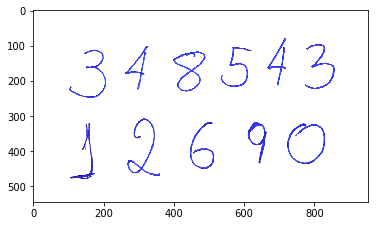

In [76]:
img = cv.imread("numbers.png")

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

### CONVERTER PARA ESCALA DE CINZA

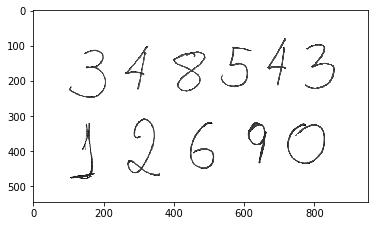

In [77]:
im_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(im_gray,cmap='gray')
plt.show()

O desfoque gaussiano é altamente eficaz na remoção do ruído gaussiano da imagem.

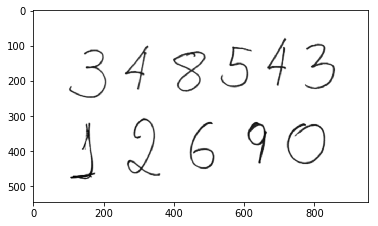

In [78]:
im_gauss = cv.GaussianBlur(im_gray, (5,5), 0)

plt.imshow(im_gauss,cmap='gray')
plt.show()

***cv2.threshold***

Threshold traz a ideia de uma simplificação da imagem para facilitar análise, trazendo onde estão os limites da imagem em questão.

argumentos da função:

- 1 - Uma imagem em tons de cinza
- 2 - Limiar de intensidade para binarização
- 3 - 255 intensidade máxima
- 4 - Transforma em binário 
    - THRESH_BINARY      - Binário Normal
    - THRESH_BINARY_INV  - Binário invertido


A função ***cv.adaptiveThreshold*** também faz análise adaptativa

### BUSCANDO O LIMIAR DA IMAGEM
im_gray.max() TEM A INTENSIDADE MÁXIMA DA IMAGEM

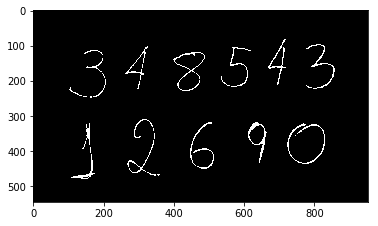

In [79]:
ret, im_th = cv.threshold(im_gauss, im_gray.max()/2, im_gray.max(), cv.THRESH_BINARY_INV)

plt.imshow(im_th,cmap='gray')
plt.show()

# BUSCAR CONTORNOS DA IMAGEM

In [80]:
ctrs, hier = cv.findContours(im_th.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

##### CRIAR RETÂNGULOS DOS CONTORNOS

In [81]:
rects = [cv.boundingRect(ctr) for ctr in ctrs]
rects

[(746, 354, 3, 3),
 (723, 322, 108, 115),
 (107, 321, 69, 159),
 (611, 318, 54, 117),
 (447, 318, 68, 132),
 (268, 308, 93, 162),
 (399, 118, 91, 113),
 (103, 113, 105, 136),
 (535, 104, 86, 114),
 (263, 102, 64, 123),
 (775, 97, 83, 126),
 (668, 81, 52, 133)]

### ORDENANDO POSIÇÃO DOS RETÂNGULOS DA ESQUEDA PARA DIREITA

In [82]:
rects.sort()
rects

[(103, 113, 105, 136),
 (107, 321, 69, 159),
 (263, 102, 64, 123),
 (268, 308, 93, 162),
 (399, 118, 91, 113),
 (447, 318, 68, 132),
 (535, 104, 86, 114),
 (611, 318, 54, 117),
 (668, 81, 52, 133),
 (723, 322, 108, 115),
 (746, 354, 3, 3),
 (775, 97, 83, 126)]

### CRIAR ÁREA SELECIONÁVEL

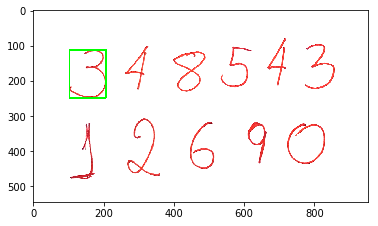

In [83]:
## CRIAR RETÂNGULOS NA IMAGEM ORIGINAL

  # DESENHAR RETANGULOS   

    #  x1,y1 ------
    #  |          |
    #  |          |
    #  |          |
    #  --------x2,y2

## selecionando propriedades do retângulo
x, y, w, h = rects[0]


## desenhando retângulo
cv.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 3)


plt.imshow(img)
plt.show()

## SELECIONAR MATRIZ DE PIXELS DO NÚMERO

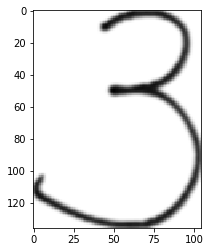

In [84]:
start_row = y
end_row   = y + h

start_col = x
end_col   = x + w

new_roi = im_gauss [ start_row : end_row , start_col : end_col ]

plt.imshow(new_roi, cmap='gray')
plt.show()

### RESIZE & PADDING

In [85]:
## TAMANHO DESEJADO
tam_final = 28

## TAMANHO ORIGINAL
old_size = new_roi.shape[:2]


## VERIFICANDO PROPORÇÃO
ratio = float(tam_final*0.8)/max(old_size)


## ALTERANDO PROPORÇÃO
new_size = tuple([int(x*ratio) for x in old_size])


## REDIMENSIONANDO IMAGEM USANDO PROPORÇÃO
new_roi = cv.resize(new_roi, (new_size[1], new_size[0]), interpolation = cv.INTER_AREA)

## PADDING
delta_w = tam_final - new_size[1]
delta_h = tam_final - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

## CRIANDO UMA BORDA ESCURA
color = [255,255,255]
new_im = cv.copyMakeBorder(new_roi, top, bottom, left, right, cv.BORDER_CONSTANT, value=color)

new_im = cv.bitwise_not(new_im)



In [86]:
new_roi.shape

(22, 17)

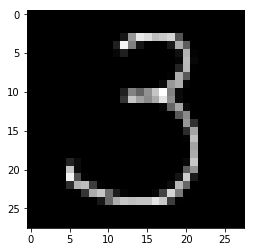

In [87]:
plt.imshow(new_im, cmap='gray')
plt.show()

## JUNTANDO TUDO
### ROI = Region of Interest

In [88]:
rois = []

## TAMANHO DESEJADO
tam_final = 28

for rect in rects:
    ## selecionando propriedades do retângulo
    x, y, w, h = rect
    
    ## desenhando retângulo
    cv.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)
    
    ## SELECIONANDO O ROI
    start_row = y
    end_row   = y + h  
    start_col = x
    end_col   = x + w

    new_roi = im_gauss[ start_row : end_row,  start_col : end_col]

    ## TAMANHO ORIGINAL
    old_size = new_roi.shape[:2]

    ## VERIFICANDO PROPORÇÃO
    ratio = float(tam_final*0.8)/max(old_size)

    ## ALTERANDO PROPORÇÃO
    new_size = tuple([int(x*ratio) for x in old_size])

    ## REDIMENSIONANDO IMAGEM USANDO PROPORÇÃO
    new_roi = cv.resize(new_roi, (new_size[1], new_size[0]))

    
    ## PADDING
    delta_w = tam_final - new_size[1]
    delta_h = tam_final - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    ## CRIANDO UMA BORDA BRANCA
    color = [255, 255, 255]
    new_im = cv.copyMakeBorder(new_roi, top, bottom, left, right, cv.BORDER_CONSTANT, value=color) 
    
    ## inverte imagem 
    new_im = cv.bitwise_not(new_im)   
    
    rois.append(new_im)



In [89]:
#convertendo lista em matriz NUMPY
rois = np.array(rois)
rois.shape

(12, 28, 28)

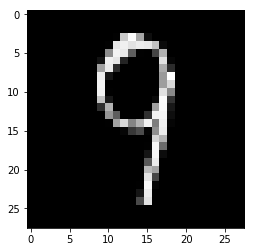

In [90]:
plt.imshow(rois[7], cmap='gray')
plt.show()

## IMPORTANDO O MODELO

In [91]:
import h5py

In [92]:
from tensorflow.keras.models import load_model

In [93]:
model = load_model("Carteiro.h5")

In [94]:
i=0
for roi in rois:
    
    roi = roi.reshape((1,28*28))
    preds = model.predict_classes(roi)
    
    pos = rects[i]  
    
    cv.putText(img, str(preds[0]), (pos[0], pos[1]), cv.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255), 1)
    
    i = i+1
    


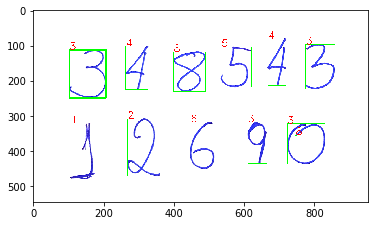

In [95]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [96]:
cv.imshow("PLOTANTO IMAGEM COM OPENcv", img)
cv.waitKey()

-1